In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
book=pd.read_csv('books.csv')
book1=book.copy()

book.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


# How many rows and columns are there in book.csv dataset

In [3]:
print('Total number of rows and columns:',book.shape)

Total number of rows and columns: (399, 24)


#  How many books do not have an original title?

In [4]:
count=0
for i in range(len(book)):
    if book.original_title[i]!=book.title[i]:
        count+=1
print('Total number of books do not have an original title:',count)

Total number of books do not have an original title: 157


# How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [5]:
book.dropna (subset= ['original_title'],inplace=True)

In [6]:
print('unique books are present in the dataset based on the book_id after removing null values in the original_title column:',book['book_id'].nunique())

unique books are present in the dataset based on the book_id after removing null values in the original_title column: 363


# What is the average rating of all the books in the dataset based on ‘average_rating’?

In [7]:
book1['average_rating'].isnull().sum()

0

In [8]:
np.average(book1['average_rating'])

3.9837844611528817

# Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [9]:
book1['original_publication_year']=book1['original_publication_year'].astype(int)

In [10]:
count=0
for i in range(len(book1)):
    if book1.original_publication_year[i]==2000:
        count+=1
print('Total number of books published in the year ‘2000’ based on the ‘original_publication_year’:',count)

Total number of books published in the year ‘2000’ based on the ‘original_publication_year’: 8


# Which book (title) has the maximum number of ratings based on ‘work_ratings_count’

In [11]:
maximum_rating=max(book1['work_ratings_count'])
maximum_rating

2024493

In [12]:

book1.loc[book1['work_ratings_count'] == maximum_rating, 'title'].iloc[0]

'The Diary of a Young Girl'

# Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket. 

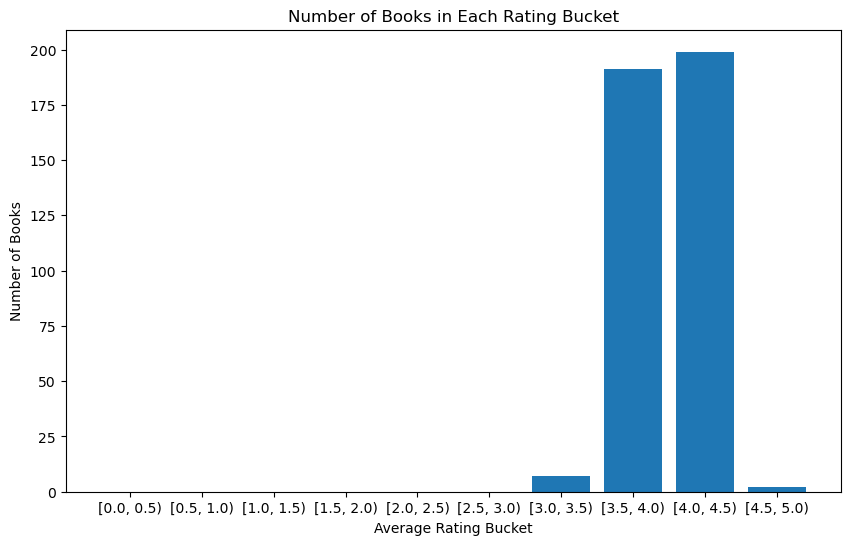

In [13]:

rating_buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
book1['rating_bucket'] = pd.cut(book1['average_rating'], bins=rating_buckets, right=False)
bucket_counts = book1['rating_bucket'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(bucket_counts.index.astype(str), bucket_counts)
plt.xlabel('Average Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()
